<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [ ]:
!pip install ucimlrepo

In [31]:
import numpy as np


from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [2]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [3]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

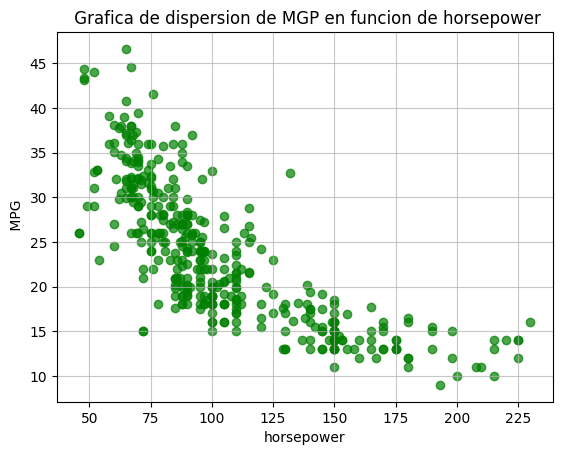

In [4]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    """ 
    Recibe los Data Frames y una columna
    devuelve una grafica con el nombre d ela columna por parmetro como columna en el eje x
    e y como MPG
    """
    #se filtran los datos para el eje x de la grafica
    x_data = df[nombre_columna]
    #grafica

    plt.figure()
    plt.scatter(x_data,y, color='green',alpha=0.7)
    plt.title(f' Grafica de dispersion de MGP en funcion de {nombre_columna}')
    plt.xlabel(nombre_columna)
    plt.ylabel(f' MPG')
    #plt.legend()
    plt.grid(alpha = 0.7)
    plt.show
    
    
    # TODO dibuja la gráfica
    

visualiza(X, y, 'horsepower')

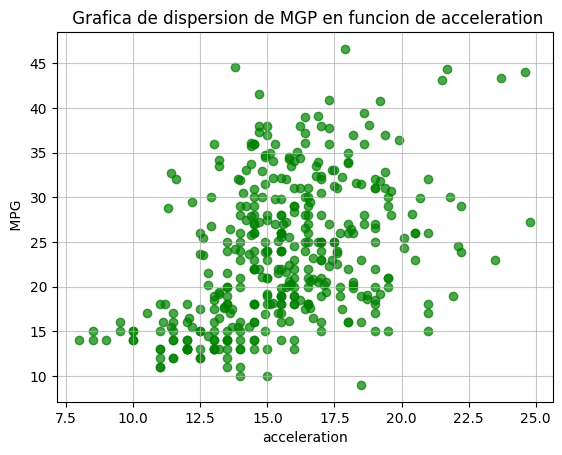

In [5]:
visualiza(X, y, 'acceleration')

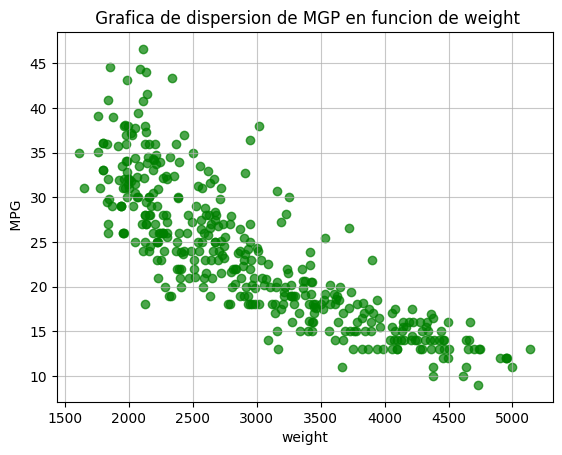

In [4]:
visualiza(X, y, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [6]:
# Donde X es el weght e Y las MPG
# comprobar que tenemos más muestras que dimensiones para que el sistea de ecuaciones tenga solucion
X_w = X[['weight']]
np.array(X_w)
X_w.shape

(398, 1)

In [ ]:
y.shape

In [7]:
ones = np.ones((398,1))
ones.shape

(398, 1)

In [8]:
#añadimos por convencion una columna de 1 por el termino independiente
X_w_ones = np.concatenate((ones,X_w), axis=1)
X_w_ones.shape

(398, 2)

In [9]:
X_w_ones2 = np.hstack((ones,X_w))
X_w_ones2

array([[1.000e+00, 3.504e+03],
       [1.000e+00, 3.693e+03],
       [1.000e+00, 3.436e+03],
       [1.000e+00, 3.433e+03],
       [1.000e+00, 3.449e+03],
       [1.000e+00, 4.341e+03],
       [1.000e+00, 4.354e+03],
       [1.000e+00, 4.312e+03],
       [1.000e+00, 4.425e+03],
       [1.000e+00, 3.850e+03],
       [1.000e+00, 3.563e+03],
       [1.000e+00, 3.609e+03],
       [1.000e+00, 3.761e+03],
       [1.000e+00, 3.086e+03],
       [1.000e+00, 2.372e+03],
       [1.000e+00, 2.833e+03],
       [1.000e+00, 2.774e+03],
       [1.000e+00, 2.587e+03],
       [1.000e+00, 2.130e+03],
       [1.000e+00, 1.835e+03],
       [1.000e+00, 2.672e+03],
       [1.000e+00, 2.430e+03],
       [1.000e+00, 2.375e+03],
       [1.000e+00, 2.234e+03],
       [1.000e+00, 2.648e+03],
       [1.000e+00, 4.615e+03],
       [1.000e+00, 4.376e+03],
       [1.000e+00, 4.382e+03],
       [1.000e+00, 4.732e+03],
       [1.000e+00, 2.130e+03],
       [1.000e+00, 2.264e+03],
       [1.000e+00, 2.228e+03],
       [

In [10]:
X_w_ones_t = np.transpose(X_w_ones)
X_inv = np.linalg.inv((X_w_ones_t@X_w_ones))
w = X_inv@X_w_ones_t@y
w


,mpg
0,46.317364
1,-0.007677


In [23]:

def pesos_ols(X, y):
    """
    Recibe las muestras X con los resultados y
    Devuelve las w como resutado de la aproximacion
    """
    # Implementa la fórmula matricial. Para poder operar con los datos tenemos que convertirlos en arrays
    X_w = np.array(X)
    y = np.array(y)
    # Añadimos una columna de 1 por w0, del tamayo de las filas de X
    ones = np.ones((X_w.shape[0],1))
    X_w_ones = np.concatenate((ones,X_w), axis=1)
    
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    if X_w.shape[0] != y.shape[0]:
        raise ValueError(f"El numero de filas en X = {X.shape[0]} debe ser igual al de y = {y.shape[0]}")
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    X_w_ones_t = np.transpose(X_w_ones)
    #X_inv = np.linalg.lstsq(X_w_ones_t@X_w_ones, y, rcond = None) --> Pesudo inversa para cuando la matriz es singular
    X_inv = np.linalg.inv((X_w_ones_t@X_w_ones))
    w = X_inv@X_w_ones_t@y

    # TODO 3 Calcula los pesos

    return w

In [29]:
# Array de prueba!!
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y1 = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
Xt = np.transpose(X)
pesos_ols(Xt, y1)

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

In [25]:
"""En este caso como las dimesiones son mayores que las observaciones hay que transponer la 
matriz para obtener resultados optimos"""


'En este caso como las dimesiones son mayores que las observaciones hay que transponer la \nmatriz para obtener resultados optimos'

Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [18]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import matplotlib.pyplot as plt

In [35]:
#Calculamos con nuestra funcion los coeficientes beta1 y beta2
f"Los coeficientes beta1 es: {pesos_ols(X_w,y)[0]} y el coeficiente beta2 es:{pesos_ols(X_w,y)[1]}"

'Los coeficientes beta1 es: [46.31736442] y el coeficiente beta2 es:[-0.00767661]'

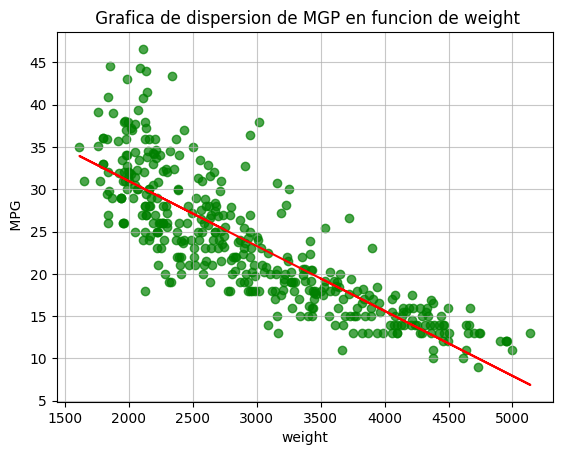

In [34]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

def visualiza(df, y, nombre_columna):
    """ 
    Recibe los Data Frames y una columna
    devuelve una grafica con el nombre d ela columna por parmetro como columna en el eje x
    e y como MPG
    """
    #se filtran los datos para el eje x de la grafica
    x_data = df[[nombre_columna]].values
    
    ##pasamos los datos del tipo data frame a numpy para poder trabajar con ellos
    x_data = x_data
    y = y.values.reshape(-1,1)
    #grafica. Encontramos los beta
    betas = pesos_ols(x_data,y)
    y_pred = betas[0] + betas[1]*x_data
    #Pintamos el diagrama de dispersion
    plt.figure()
    plt.scatter(x_data,y, color='green',alpha=0.7)
    #Ahora la recta obtenida
    plt.plot(x_data, y_pred, color = "red", label = "Regresion lineal")
    
    plt.title(f' Grafica de dispersion de MGP en funcion de {nombre_columna}')
    plt.xlabel(nombre_columna)
    plt.ylabel(f' MPG')
    #plt.legend()
    plt.grid(alpha = 0.7)
    plt.show()

visualiza(X,y,'weight')

Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [21]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



En una una regresion lineal: el objetivo es representar una recta que pase lo mas cerca posible de todos los valores dados. Lo que hacemos es recoger los errores verticales(la diferencia entre nuestra prediccion y el valor real dado) a la recta en una funcion ( funcion de coste ) y se optimiza para buscar el minimo. Los valores de beta que hace ese punto minimo es el error más pequeño. Esos valores son el punto de corte con la recta (y=0, intecepto) y beta n, en funcion de la variables que tengamos.

En el descenso de gradiente: el objetivo es el mismo. Lo que hacemos es que con unos valores iniciales (punto de incio,
learning rate, nuestras muestras y, en funcion de x) y mediante un proceso iterativo, se optimiza una funcion (de coste)
que depende del error (en este caso MSE).Se va calculando la pendiente (gradiente) maxima en cada punto (mediante derivadas
parciales) y usa ese dato para moverse en contra de donde hay la mayor pendiente. Esto se repite hasta que la pendiente 
sea practicamente cero o la variacion sea insignificante.

## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [23]:
X_w1 = np.array(X_w)
X_w1

array([[3504],
       [3693],
       [3436],
       [3433],
       [3449],
       [4341],
       [4354],
       [4312],
       [4425],
       [3850],
       [3563],
       [3609],
       [3761],
       [3086],
       [2372],
       [2833],
       [2774],
       [2587],
       [2130],
       [1835],
       [2672],
       [2430],
       [2375],
       [2234],
       [2648],
       [4615],
       [4376],
       [4382],
       [4732],
       [2130],
       [2264],
       [2228],
       [2046],
       [2634],
       [3439],
       [3329],
       [3302],
       [3288],
       [4209],
       [4464],
       [4154],
       [4096],
       [4955],
       [4746],
       [5140],
       [2962],
       [2408],
       [3282],
       [3139],
       [2220],
       [2123],
       [2074],
       [2065],
       [1773],
       [1613],
       [1834],
       [1955],
       [2278],
       [2126],
       [2254],
       [2408],
       [2226],
       [4274],
       [4385],
       [4135],
       [4129],
       [36

In [21]:
y1 = np.array(y)
y1

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

In [97]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    y = np.array(y).reshape(X.shape[0],1)
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # TODO 1 Añade la columna de 1s
    
    ones = np.ones((X.shape[0],1))
    
    X_ones = np.concatenate((X, ones),axis = 1)
    
    
    # TODO 2 Haz un bucle para las iteraciones 
    
    for i in range(n_iter):
        
        #SE CALCULA LOS Y_HAT(VALORES ESTIMADOS), LOS VALORES PREDICHOS EN FUNCION DE LAS X DADAS, QUE NO ES MAS QUE LA X POR EL BETA(W)
        y_hat = np.dot(X_ones, w)# Y_HAT ES X*W EN CADA CASO
        #CALCULAMOS EL RESIDUO(ERROR)
        RSS = y_hat - y #TAMBIEN SE PUEDE ESCRIBIR COMO 1/2(E^T*E) --> IMPORTANTE
        #CALCULAMOS EL ERROR EN CADA ITERACION EN FUNCION DEL COMENTARIO ANTERIOR
        rss_iter = (1/2)*np.dot(RSS.T, RSS) #ESTO ES EL ERROR EN CADA IERACION
        #CALCULAMOS EL GRALDIENTE EN CADA IERACION PARA VER COMO NOS MOVEMOS 
        grad_rss = np.dot(X_ones.T, RSS)# EL GRADIENTE VIENE DADO POR X^T(Xw^t-y)--> DONDE EL PARENTSESIS ES EL ERROR. Indica la direccion en la que el error aumneta. El descenso del gradiente usa esta info para ajustar en direccion contraria los w(los pesos)
    
        #TODO 3 Dentro del bucle tendrás que actualizar el error y los pesos y añadirlos a las listas
       
        #ACTUALIZAMOS EL PARAMETRO W, MOVIENDOSE EN LA DIREECION CONTRARIA AL GRADINETE
        w = w - eta*grad_rss #RESTAMOS EL PASO MULTIPLICADO POR EL GRADIENTE PARA CAMBIAR LA ITERACION
        #ANADIMOS A NUESTRA LISTA CADA W DE CADA ITERACION
        w_iter.append(w)
        loss_iter.append(rss_iter.item())
        
        print(f"Iteración: {i + 1}: El error cuadratico medio es: {rss_iter.item()}")
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)


eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])
print(loss)


Iteración: 1: El error cuadratico medio es: 104232751380.75012
Iteración: 2: El error cuadratico medio es: 92210292285.4099
Iteración: 3: El error cuadratico medio es: 81621714838.60889
Iteración: 4: El error cuadratico medio es: 72295562147.84842
Iteración: 5: El error cuadratico medio es: 64080890758.50876
Iteración: 6: El error cuadratico medio es: 56844816091.85215
Iteración: 7: El error cuadratico medio es: 50470351594.39633
Iteración: 8: El error cuadratico medio es: 44854506453.14236
Iteración: 9: El error cuadratico medio es: 39906610936.66019
Iteración: 10: El error cuadratico medio es: 35546842124.320786
Iteración: 11: El error cuadratico medio es: 31704926045.233032
Iteración: 12: El error cuadratico medio es: 28318995117.708374
Iteración: 13: El error cuadratico medio es: 25334582306.00349
Iteración: 14: El error cuadratico medio es: 22703735634.766323
Iteración: 15: El error cuadratico medio es: 20384238659.19974
Iteración: 16: El error cuadratico medio es: 18338924212.301

### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [102]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

Iteración: 1: El error cuadratico medio es: 122160.38
Iteración: 2: El error cuadratico medio es: 112921.49807591195
Iteración: 3: El error cuadratico medio es: 104403.39639445828
Iteración: 4: El error cuadratico medio es: 96549.8425930608
Iteración: 5: El error cuadratico medio es: 89308.99133089097
Iteración: 6: El error cuadratico medio es: 82633.04203115661
Iteración: 7: El error cuadratico medio es: 76477.92332495231
Iteración: 8: El error cuadratico medio es: 70803.00211352648
Iteración: 9: El error cuadratico medio es: 65570.81532833443
Iteración: 10: El error cuadratico medio es: 60746.822618088445
Iteración: 11: El error cuadratico medio es: 56299.17833016529
Iteración: 12: El error cuadratico medio es: 52198.52128110299
Iteración: 13: El error cuadratico medio es: 48417.78092835405
Iteración: 14: El error cuadratico medio es: 44931.99866373555
Iteración: 15: El error cuadratico medio es: 41718.16304884224
Iteración: 16: El error cuadratico medio es: 38755.05790472702
Iteraci

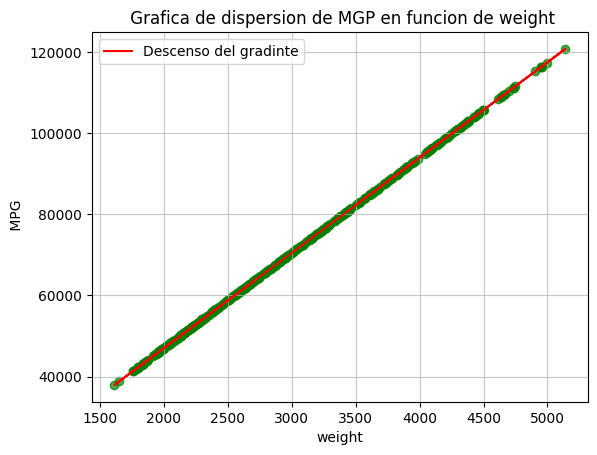

In [121]:
### TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X[['weight']].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy().reshape(-1,1)

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np


# TODO 1 Punto inicial y learning rate
w0 = np.array([0, 0]).reshape(2, 1)
eta = 0.0001
n_iter = 1000

# TODO 2 Aplicamos el algoritmo 
weights, loss = gradient_descent(X_gd, y_gd, w0, n_iter, eta)

print(weights[-1])

# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# TODO 3 Dibuja la gráfica
   
#grafica. Encontramos los beta
y_pred = -6.49270202 + X_np*23.51457286
#Pintamos el diagrama de dispersion
plt.figure()
plt.scatter(X_np,y_pred, color='green',alpha=0.7)
#Ahora la recta obtenida
plt.plot(X_np, y_pred, color = "red", label = "Descenso del gradinte")

plt.title(f' Grafica de dispersion de MGP en funcion de {'weight'}')
plt.xlabel('weight')
plt.ylabel(f' MPG')
plt.legend()
plt.grid(alpha = 0.7)
plt.show()

En conclusion

El modelo de descenso del gradiente nos da una pendiente positiva de 23,51, lo que indica una relacion proporcional directa entre el peso y el consumo, que es como cabria esperar, ya que un vehiculo consume más cuanto más pesa.
En el modelo de regresion lineal nos da una pendiente negativa -0.0007, que aunque sea un valor casi prosimo a cero, no se corresponde con la realidad tampoco porque no todos los coches consumen lo mismo o menos a medida que varia el peso. Quizas el modelo de regresion lineal no captura bien la relacion entre las variables o no esta bien ajustado.

En este caso nos quedariamos con el modelo mediante descenso del gradiente ya que parece que se ajusta mejor a la realidad y a lo que cabria esperar.
